<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/assignment_2/LR_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df[input_features + [output_feature]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [36]:
X_train = df_train[input_features].to_numpy()
y_train = df_train[output_feature].to_numpy()
X_val = df_test[input_features].to_numpy()
y_val = df_test[output_feature].to_numpy()

In [37]:
def Linear_Regression(X_train, y_train, X_val, y_val, epochs, alpha):
  training_loss = []
  validation_loss = []

  m, n = X_train.shape
  np.random.seed(0)
  theta = np.random.randn(n+1,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
  y_train = y_train.reshape(m,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  for iteration in range(epochs):
      gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
      theta -= alpha * gradients

      train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      training_loss.append(train_loss)
      validation_loss.append(val_loss)
  return theta, training_loss, validation_loss



In [38]:
theta_alpha_1, train_loss_alpha_1, val_loss_alpha_1  = Linear_Regression(X_train, y_train, X_val, y_val,25, alpha = 0.01)
print("Done 1")
theta_alpha_2, train_loss_alpha_2, val_loss_alpha_2  = Linear_Regression(X_train, y_train, X_val, y_val,25, alpha = 0.1)

Done 1


<ipython-input-37-447b13137e80>:18: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-37-447b13137e80>:19: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


In [39]:
theta_alpha_2

array([[9.90020847e+168],
       [5.98226828e+172],
       [2.95202840e+169],
       [1.31733507e+169],
       [1.82423934e+169],
       [8.44965659e+168]])

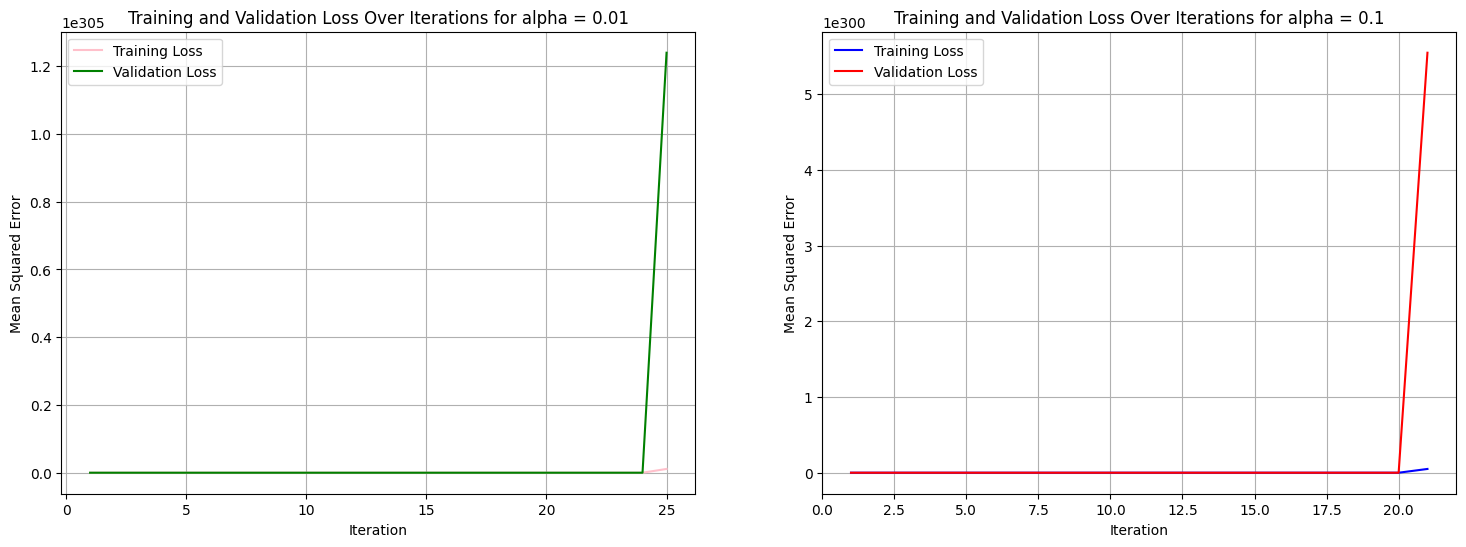

In [40]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_1) + 1), train_loss_alpha_1, color='pink', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_1) + 1), val_loss_alpha_1, color='green', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_2) + 1), train_loss_alpha_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_2) + 1), val_loss_alpha_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [11]:
input_features_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features_2 = 'price'

In [12]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [15]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_2, df_test_2 = train_test_split(df[input_features_2 + [output_features_2]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [16]:
X_train_2 = df_train_2[input_features_2].to_numpy()
y_train_2 = df_train_2['price'].to_numpy()
X_val_2 = df_test_2[input_features_2].to_numpy()
y_val_2 = df_test_2['price'].to_numpy()

In [17]:
theta_alpha_3, train_loss_alpha_3, val_loss_alpha_3  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha = 0.00000001)
print("Done 1")
theta_alpha_4, train_loss_alpha_4, val_loss_alpha_4  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha = 0.00001)

Done 1


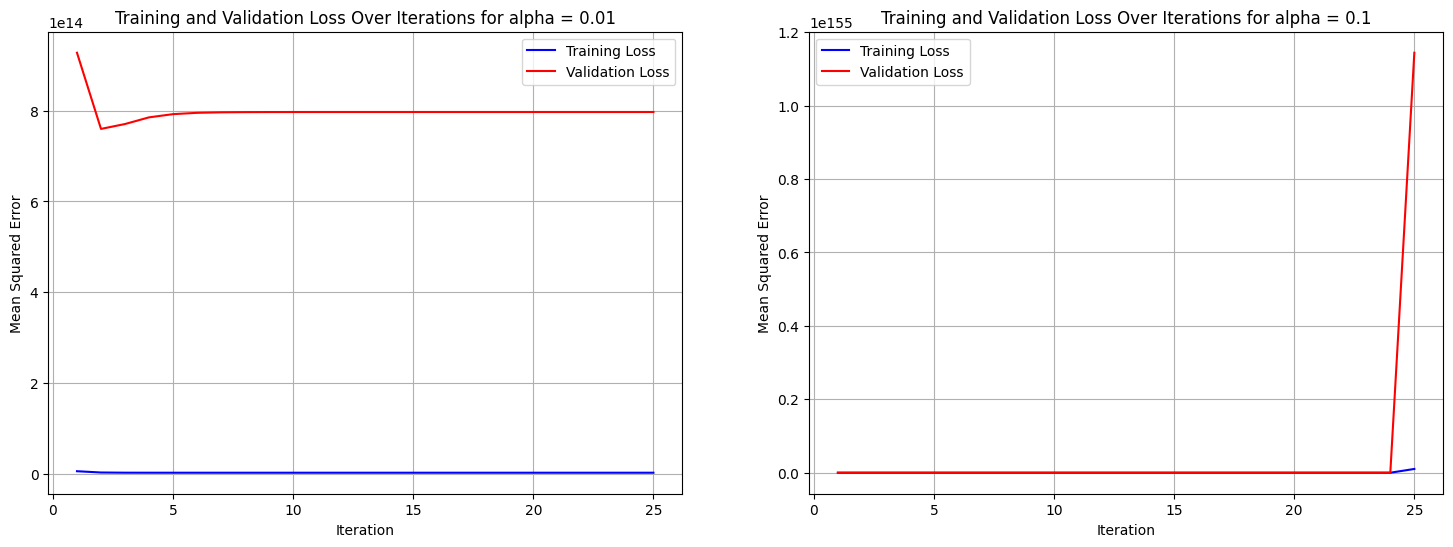

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_3) + 1), train_loss_alpha_3, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_3) + 1), val_loss_alpha_3, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_4) + 1), train_loss_alpha_4, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_4) + 1), val_loss_alpha_4, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [19]:
theta_alpha_4

array([[9.50980640e+68],
       [5.74636516e+72],
       [2.83561893e+69],
       [1.26538765e+69],
       [1.75230279e+69],
       [8.62111905e+68],
       [1.87090988e+68],
       [3.50695726e+68],
       [5.27902453e+67],
       [3.23226420e+68],
       [8.11645517e+68],
       [2.56809609e+68]])

Problem 2a

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer_input = MinMaxScaler()
standardizer_input = StandardScaler()
normalizer_output = MinMaxScaler()
standardizer_output = StandardScaler()

X_train_normalize = normalizer_input.fit_transform(df_train[input_features])
y_train_normalize = normalizer_output.fit_transform(df_train[[output_feature]])

X_test_normalize = normalizer_input.transform(df_test[input_features])
y_test_normalize = normalizer_output.transform(df_test[[output_feature]])

X_train_standard = normalizer_input.fit_transform(df_train[input_features])
y_train_standard = standardizer_output.fit_transform(df_train[[output_feature]])

X_test_standard = normalizer_input.transform(df_test[input_features])
y_test_standard = standardizer_output.transform(df_test[[output_feature]])


In [21]:
theta_alpha_normal_input, train_loss_alpha_normal_input, val_loss_alpha_normal_input = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val ,1000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_input_1, train_loss_alpha_normal_input_1, val_loss_alpha_normal_input_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val, 1000, alpha = 0.1)

theta_alpha_normal, train_loss_alpha_normal, val_loss_alpha_normal = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize ,1000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_1, train_loss_alpha_normal_1, val_loss_alpha_normal_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize, 1000, alpha = 0.1)

Done 1
Done 1


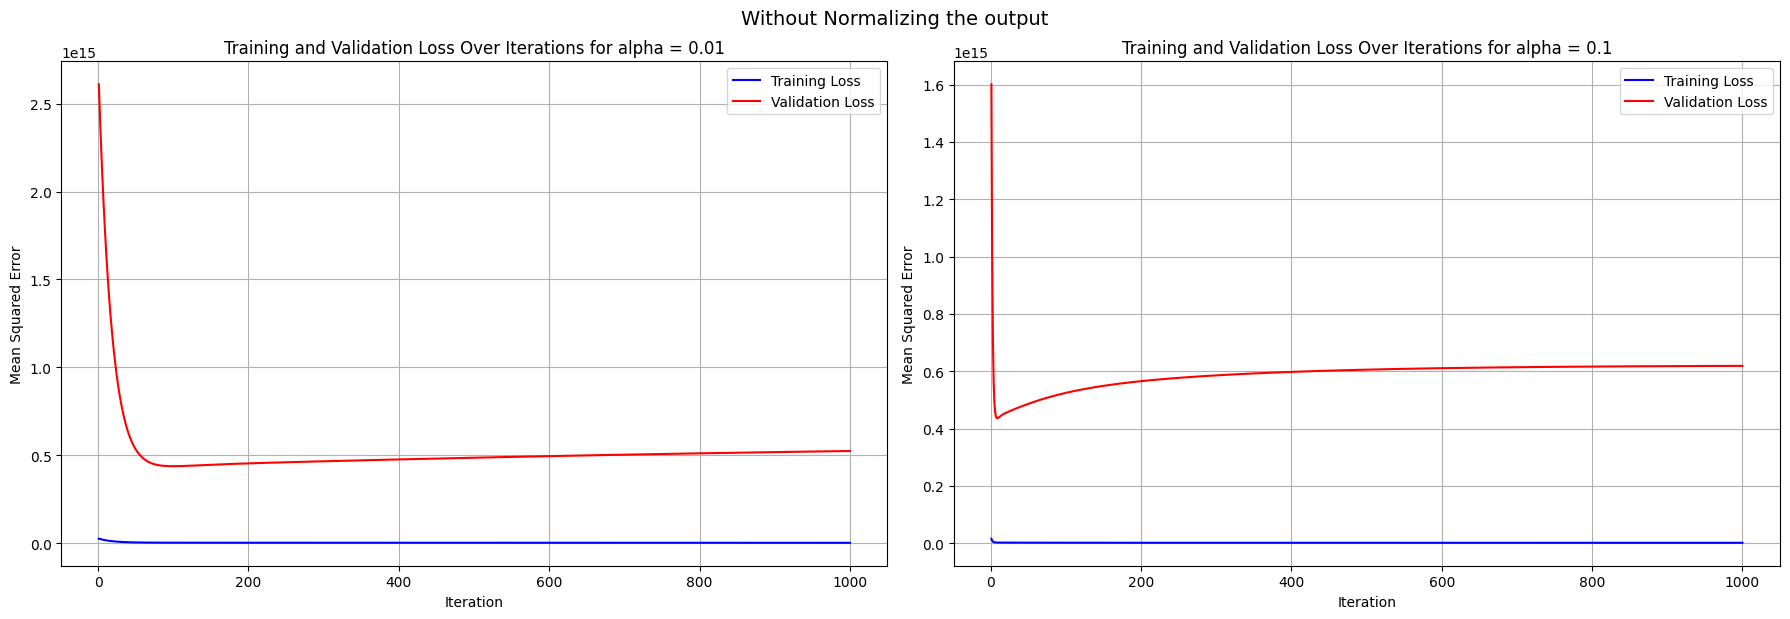

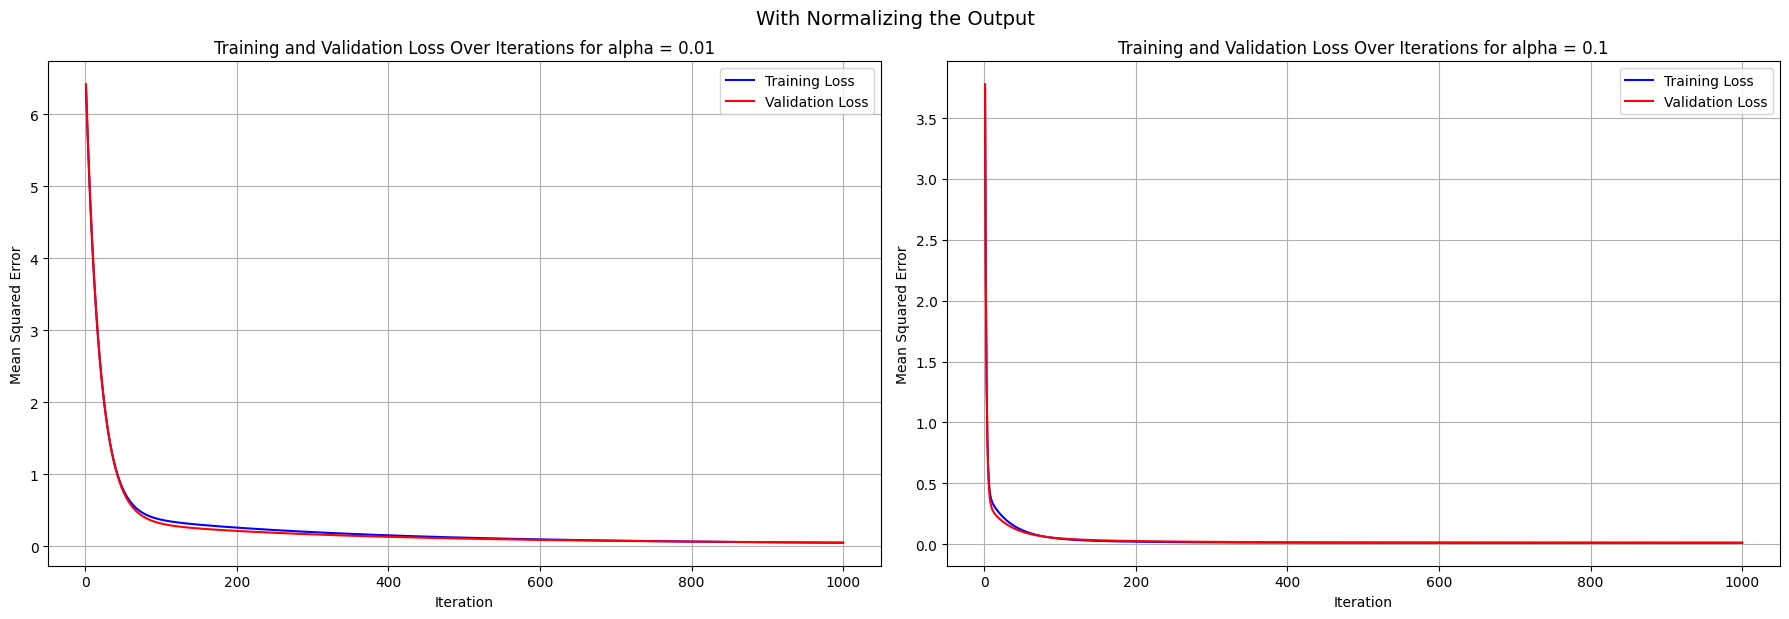

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input) + 1), train_loss_alpha_normal_input, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input) + 1), val_loss_alpha_normal_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1) + 1), train_loss_alpha_normal_input_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1) + 1), val_loss_alpha_normal_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal) + 1), train_loss_alpha_normal, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal) + 1), val_loss_alpha_normal, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1) + 1), train_loss_alpha_normal_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1) + 1), val_loss_alpha_normal_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()


In [23]:
theta_alpha_standard_input, train_loss_alpha_standard_input, val_loss_alpha_standard_input = Linear_Regression(X_train_standard,
                                                                                                               y_train,
                                                                                                               X_test_standard,
                                                                                                               y_val,1000, alpha = 0.01)
print("Done 1")
theta_alpha_standard_input_1, train_loss_alpha_standard_input_1, val_loss_alpha_standard_input_1 = Linear_Regression(X_train_standard,
                                                                                                                     y_train,
                                                                                                                     X_test_standard,
                                                                                                                     y_val,1000, alpha = 0.1)

theta_alpha_standard, train_loss_alpha_standard, val_loss_alpha_standard = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,1000, alpha = 0.01)
print("Done 1")
theta_alpha_standard_1, train_loss_alpha_standard_1, val_loss_alpha_standard_1 = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,1000, alpha = 0.1)

Done 1
Done 1


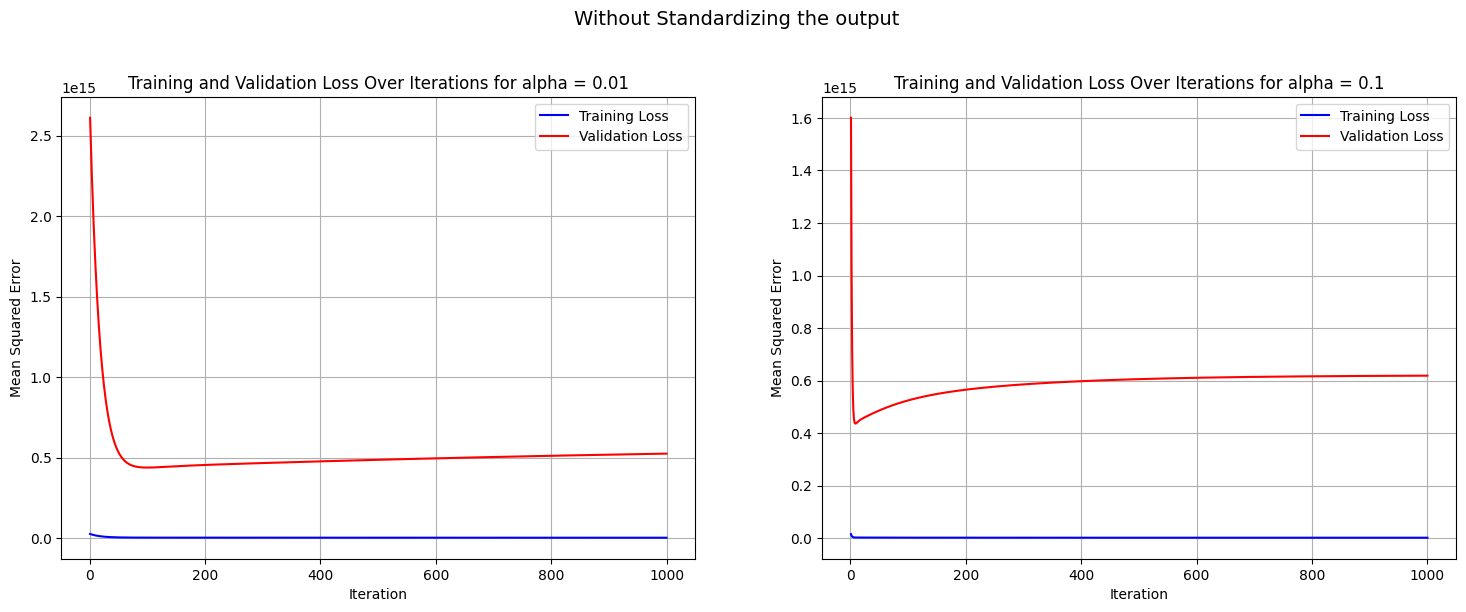

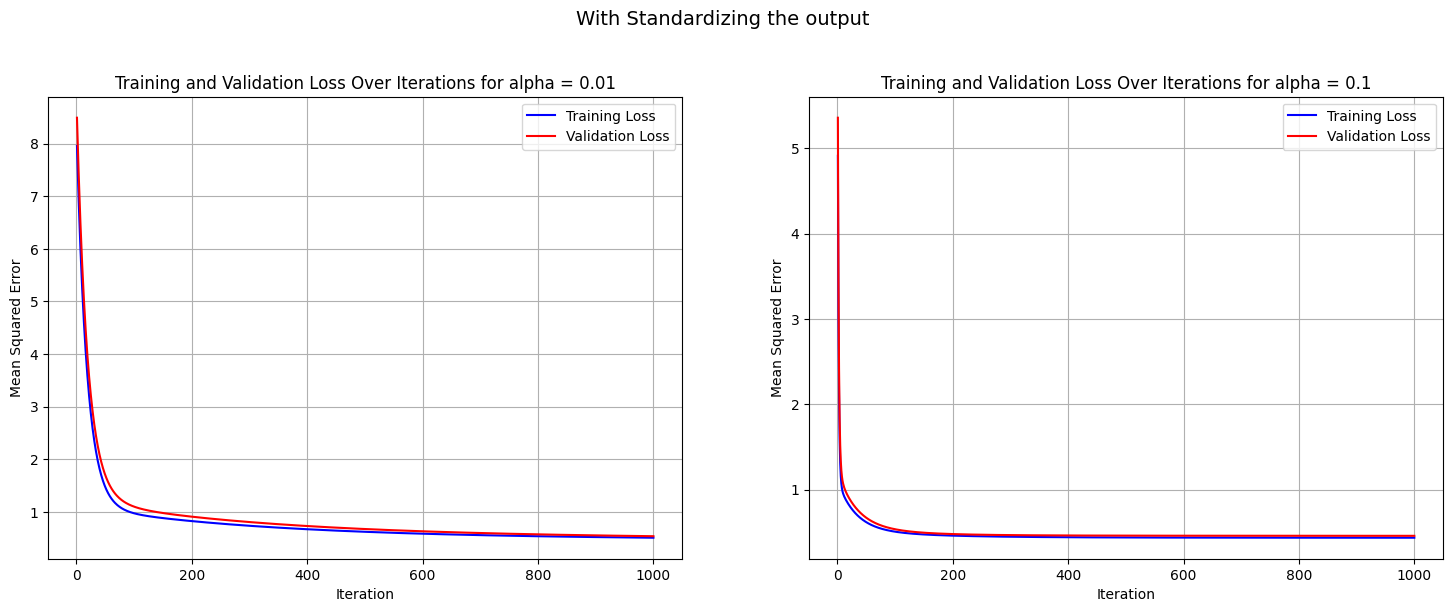

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input) + 1), train_loss_alpha_standard_input, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input) + 1), val_loss_alpha_standard_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1) + 1), train_loss_alpha_standard_input_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1) + 1), val_loss_alpha_standard_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard) + 1), train_loss_alpha_standard, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard) + 1), val_loss_alpha_standard, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1) + 1), train_loss_alpha_standard_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1) + 1), val_loss_alpha_standard_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [25]:
train_loss_alpha_normal[-1], train_loss_alpha_normal_1[-1], train_loss_alpha_standard[-1], train_loss_alpha_standard_1[-1]

(0.04520318017409938,
 0.011443120035882751,
 0.5091912910899866,
 0.43765533971814363)

In [26]:
val_loss_alpha_normal[-1], val_loss_alpha_normal_1[-1], val_loss_alpha_standard[-1], val_loss_alpha_standard_1[-1]

(0.048246951085674,
 0.012279455007860398,
 0.537983222944406,
 0.4599040599727388)

In [27]:
normalizer_input_2 = MinMaxScaler()
normalizer_output_2 = MinMaxScaler()
standardizer_input_2 = StandardScaler()
standardizer_output_2 = StandardScaler()

X_train_normalize_2 = normalizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_normalize_2 = normalizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_normalize_2 = normalizer_input_2.transform(df_test_2[input_features_2])
y_test_normalize_2 = normalizer_output_2.transform(df_test_2[[output_features_2]])

X_train_standard_2 = standardizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_standard_2 = standardizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_standard_2 = standardizer_input_2.transform(df_test_2[input_features_2])
y_test_standard_2 = standardizer_output_2.transform(df_test_2[[output_features_2]])


In [28]:
theta_alpha_normal_input_2, train_loss_alpha_normal_input_2, val_loss_alpha_normal_input_2 = Linear_Regression(X_train_normalize_2,
                                                                                                              y_train_2,
                                                                                                              X_test_normalize_2,
                                                                                                              y_val_2 ,1000, alpha = 0.01)
theta_alpha_normal_input_1_2, train_loss_alpha_normal_input_1_2, val_loss_alpha_normal_input_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_normalize_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_normal_2, train_loss_alpha_normal_2, val_loss_alpha_normal_2 = Linear_Regression(X_train_normalize_2,
                                                                                            y_train_normalize_2,
                                                                                            X_test_normalize_2,
                                                                                            y_test_normalize_2 ,1000, alpha = 0.01)
theta_alpha_normal_1_2, train_loss_alpha_normal_1_2, val_loss_alpha_normal_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                   y_train_normalize_2,
                                                                                                   X_test_normalize_2,
                                                                                                   y_test_normalize_2, 1000, alpha = 0.1)

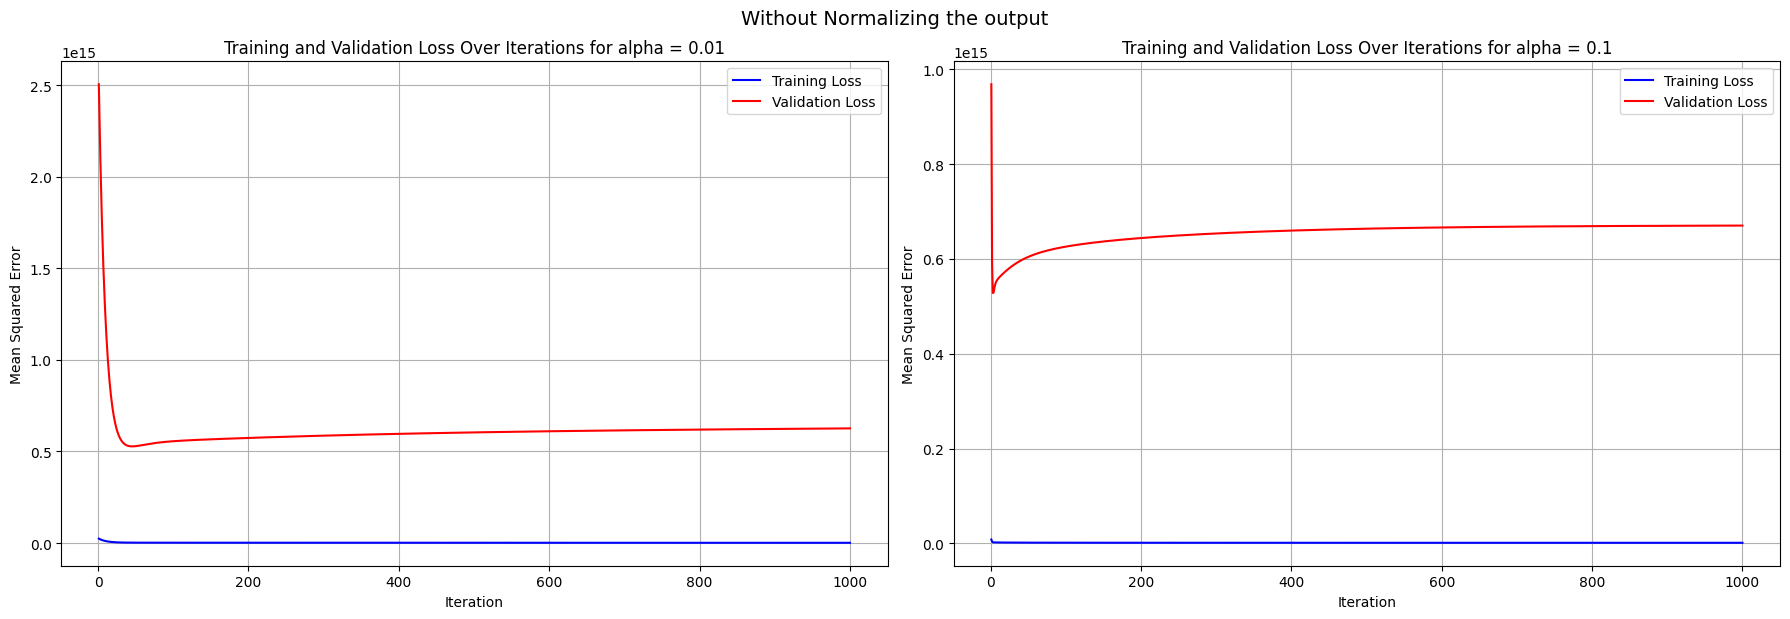

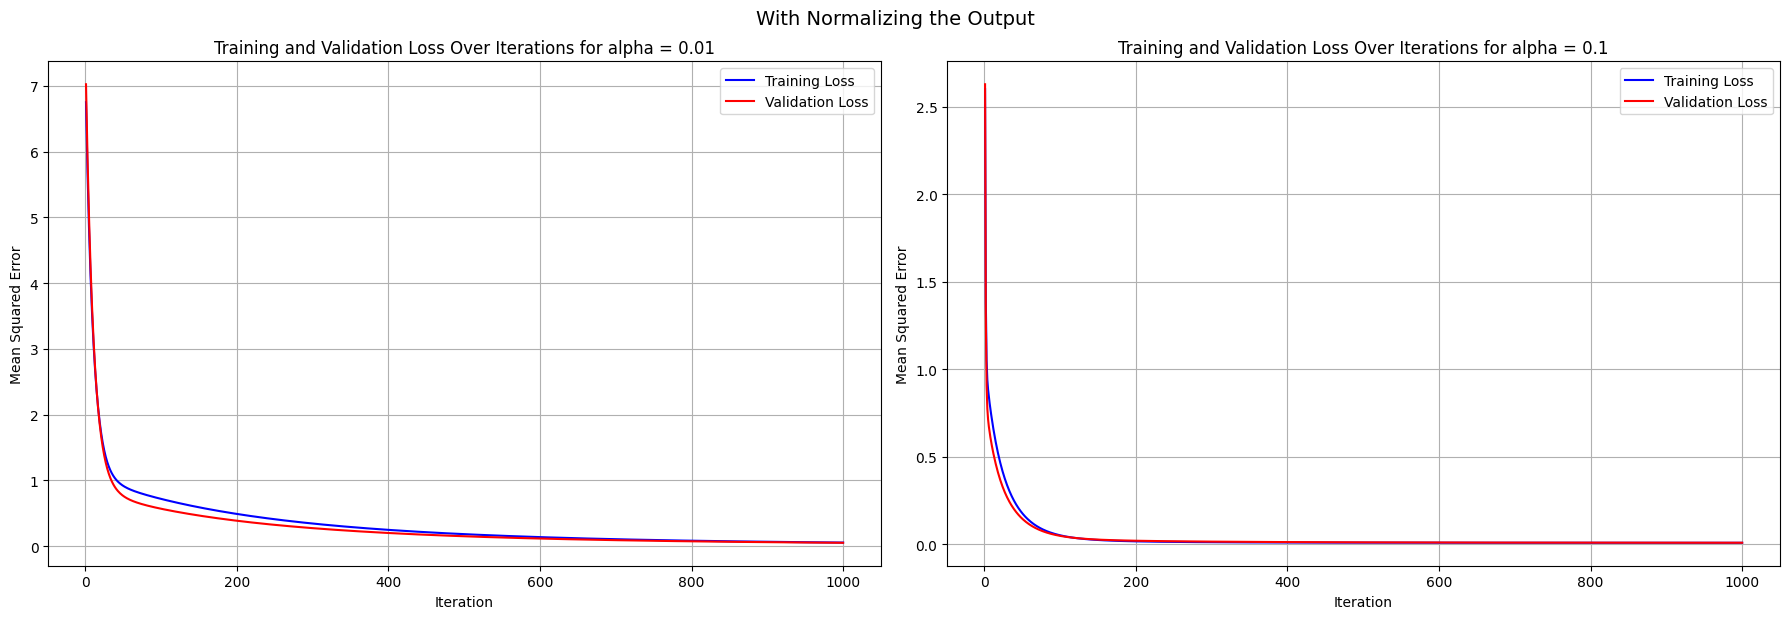

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input_2) + 1), train_loss_alpha_normal_input_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_2) + 1), val_loss_alpha_normal_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1_2) + 1), train_loss_alpha_normal_input_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1_2) + 1), val_loss_alpha_normal_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_2) + 1), train_loss_alpha_normal_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_2) + 1), val_loss_alpha_normal_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1_2) + 1), train_loss_alpha_normal_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1_2) + 1), val_loss_alpha_normal_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()


In [30]:
theta_alpha_standard_input_2, train_loss_alpha_standard_input_2, val_loss_alpha_standard_input_2 = Linear_Regression(X_train_standard_2,
                                                                                                               y_train_2,
                                                                                                               X_test_standard_2,
                                                                                                               y_val_2,1000, alpha = 0.01)
theta_alpha_standard_input_1_2, train_loss_alpha_standard_input_1_2, val_loss_alpha_standard_input_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_standard_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_standard_2, train_loss_alpha_standard_2, val_loss_alpha_standard_2 = Linear_Regression(X_train_standard_2,
                                                                                             y_train_standard_2,
                                                                                             X_test_standard_2,
                                                                                             y_test_standard_2, 500, alpha = 0.01)
theta_alpha_standard_1_2, train_loss_alpha_standard_1_2, val_loss_alpha_standard_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                   y_train_standard_2,
                                                                                                   X_test_standard_2,
                                                                                                   y_test_standard_2, 500, alpha = 0.1)

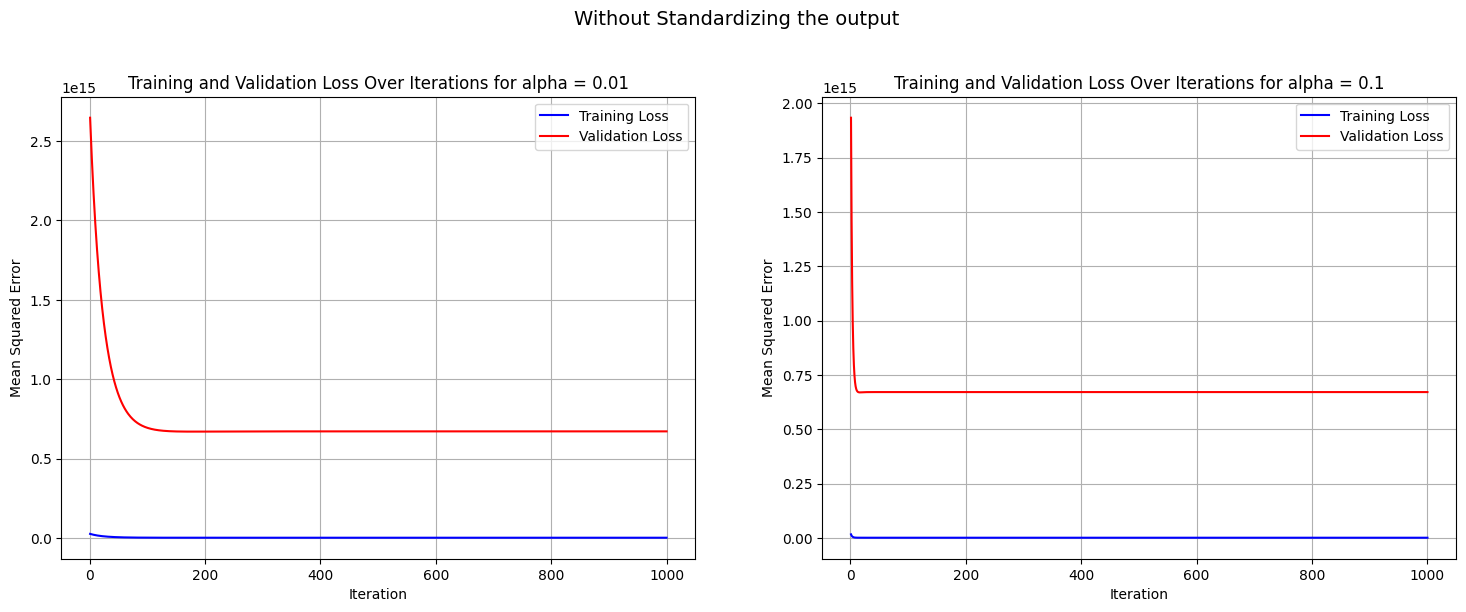

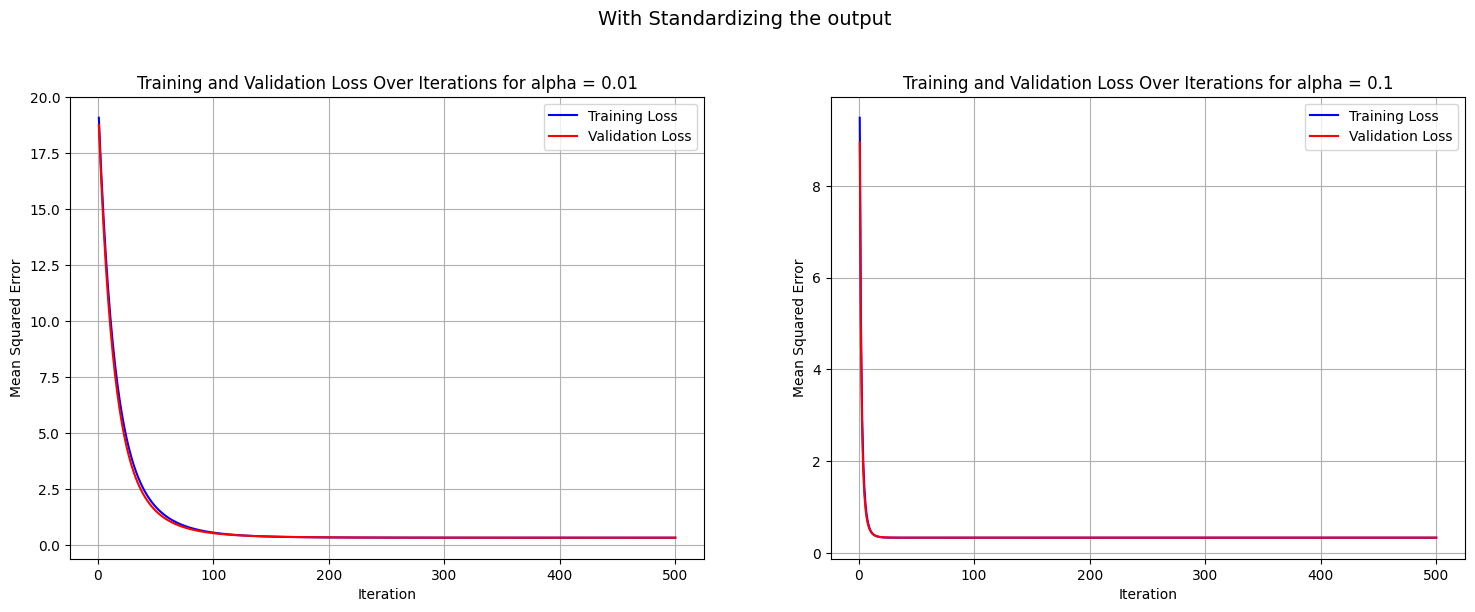

In [31]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input_2) + 1), train_loss_alpha_standard_input_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_2) + 1), val_loss_alpha_standard_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1_2) + 1), train_loss_alpha_standard_input_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1_2) + 1), val_loss_alpha_standard_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_2) + 1), train_loss_alpha_standard_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_2) + 1), val_loss_alpha_standard_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1_2) + 1), train_loss_alpha_standard_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1_2) + 1), val_loss_alpha_standard_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()
